In [23]:
from qiskit.tools.visualization import plot_histogram
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, IBMQ, BasicAer
import math
import Qconfig
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview


In [24]:
q = QuantumRegister(7)
c = ClassicalRegister(3)

IBMQ.enable_account(Qconfig.APItoken, url=Qconfig.config['url'])
backend = IBMQ.get_backend('ibmq_16_melbourne')

print(backend)

# quantum circuit to make a Bell state
shor = QuantumCircuit(q, c)

shor.h(q[0])
shor.h(q[1])
shor.h(q[2])
shor.x(q[6])
shor.cx(q[2], q[4])
shor.cx(q[2], q[5])
shor.cx(q[3], q[5])
shor.ccx(q[1], q[5], q[3])
shor.cx(q[3], q[5])
shor.cx(q[6], q[4])
shor.ccx(q[1], q[4], q[6])
shor.cx(q[6], q[4])
shor.h(q[0])
shor.cu1(math.pi / 2, q[0], q[1])
shor.h(q[1])
shor.cu1(math.pi / 4, q[0], q[2])
shor.cu1(math.pi / 2, q[1], q[2])
shor.h(q[2])
shor.measure(q[0], c[0])
shor.measure(q[1], c[1])
shor.measure(q[2], c[2])

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqprovider.py:251: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


ibmq_16_melbourne


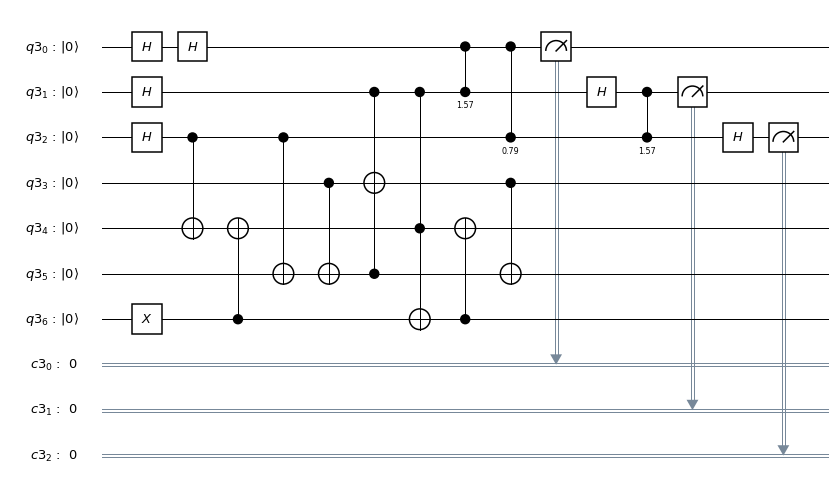

In [28]:
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
shor.draw(output='mpl')
# job = execute(shor, backend, shots=10).result()
# data = job.get_counts(shor)
# print(data)
# plot_histogram(data)
# backend_monitor(backend)
